In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
# from astroquery.sdss import SDSS

In [2]:
# data1 = SDSS.query_sql("""SELECT p.g, p.i, p.r, s.z 
#                       FROM PhotoObj AS p 
#                       JOIN SpecObj AS s ON s.bestobjid = p.objid 
#                       WHERE s.z BETWEEN 0.09 AND 0.1 AND s.class = 'GALAXY'""")
# data2 = SDSS.query_sql("""SELECT p.g, p.i, p.r, s.z 
#                       FROM PhotoObj AS p 
#                       JOIN SpecObj AS s ON s.bestobjid = p.objid 
#                       WHERE s.z BETWEEN 1 AND 1.01 AND s.class = 'GALAXY'""")

In [3]:
# df_raw1 = data1.to_pandas()
# df_raw2 = data2.to_pandas()
df_raw1 = pd.read_csv("sdss1.csv", skiprows=1)
df_raw2 = pd.read_csv("sdss2.csv", skiprows=1)

In [4]:
df_raw1.head()

,g,i,r,z
0,18.38842,16.91446,17.39486,0.090003
1,18.15982,17.11402,17.49652,0.090216
2,17.57465,16.65032,17.01140,0.090078
3,17.18402,15.81704,16.25085,0.090147
4,17.55457,16.36927,16.75893,0.090174


In [5]:
df_raw2.head()

,g,i,r,z
0,22.90882,20.55082,22.34431,1.007210
1,22.06019,21.91906,22.27788,1.007200
2,25.69687,22.14537,23.56538,1.009317
3,21.82344,21.61319,21.80341,1.000607
4,21.55966,21.20876,21.10998,1.000698


In [6]:
mask = (df_raw1['g'] > 0)*(df_raw1['r'] > 0)*(df_raw1['i'] > 0)
df1 = df_raw1[mask]
mask = (df_raw2['g'] > 0)*(df_raw2['r'] > 0)*(df_raw2['i'] > 0)
df2 = df_raw2[mask]

51495


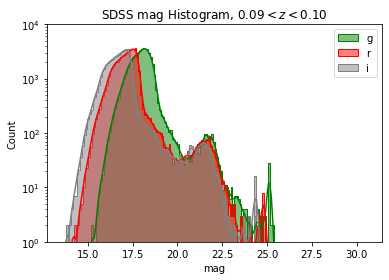

In [7]:
binwidth = 0.1
sns.histplot(x='g', data=df1, color="green", label="g", binwidth=binwidth, kde=True, element="step")
sns.histplot(x='r', data=df1, color="red", label='r', binwidth=binwidth, kde=True, element="step")
sns.histplot(x='i', data=df1, color="grey", label='i', binwidth=binwidth, kde=True, element="step")
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1, 1e4)
plt.title(r"SDSS mag Histogram, $0.09<z<0.10$")
plt.legend()
# plt.savefig('gri1.jpg', dpi=500)
print(len(df1))

2958


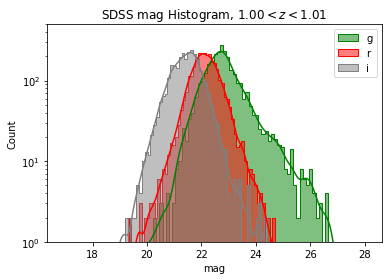

In [8]:
sns.histplot(x='g', data=df2, color="green", label="g", kde=True, element="step")
sns.histplot(x='r', data=df2, color="red", label='r', kde=True, element="step")
sns.histplot(x='i', data=df2, color="grey", label='i', kde=True, element="step")
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1, 5e2)
plt.title(r"SDSS mag Histogram, $1.00<z<1.01$")
plt.legend()
plt.savefig('gri2.jpg', dpi=500)
print(len(df2))

### Distance

In [9]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [10]:
df1 = df1.assign(dist=cosmo.luminosity_distance(df1.loc[:, 'z'].values).value)
df1 = df1.assign(M_i=df1['i'].values - 25 - 5*np.log10(df1['dist'].values),
                M_g=df1['g'].values - 25 - 5*np.log10(df1['dist'].values),
                M_r=df1['r'].values - 25 - 5*np.log10(df1['dist'].values))
df1

,g,i,r,z,dist,M_i,M_g,M_r
0,18.38842,16.91446,17.39486,0.090003,411.494389,-21.157360,-19.683400,-20.676960
1,18.15982,17.11402,17.49652,0.090216,412.525588,-20.963234,-19.917434,-20.580734
2,17.57465,16.65032,17.01140,0.090078,411.856449,-21.423409,-20.499079,-21.062329
3,17.18402,15.81704,16.25085,0.090147,412.191320,-22.258454,-20.891474,-21.824644
4,17.55457,16.36927,16.75893,0.090174,412.322102,-21.706913,-20.521613,-21.317253
...,...,...,...,...,...,...,...,...
51496,17.63168,16.09784,16.58958,0.097074,445.949039,-22.148586,-20.614746,-21.656846
51497,18.15485,17.23228,17.62438,0.097445,447.766360,-21.022977,-20.100407,-20.630877
51498,17.59973,16.04534,16.54169,0.097461,447.845927,-22.210303,-20.655913,-21.713953
51499,22.55894,19.04942,20.65257,0.097226,446.695714,-19.200639,-15.691119,-17.597489


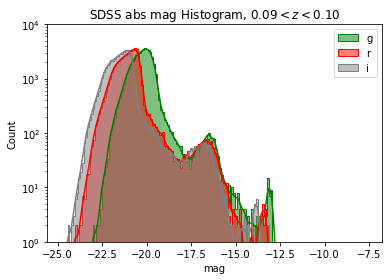

In [11]:
binwidth = 0.1
sns.histplot(x='M_g', data=df1, color="green", label="g", binwidth=binwidth, kde=True, element="step")
sns.histplot(x='M_r', data=df1, color="red", label='r', binwidth=binwidth, kde=True, element="step")
sns.histplot(x='M_i', data=df1, color="grey", label='i', binwidth=binwidth, kde=True, element="step")
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1, 1e4)
plt.title(r"SDSS abs mag Histogram, $0.09<z<0.10$")
plt.legend()
# plt.savefig('gri1.jpg', dpi=500)
# print(len(df1))

In [12]:
df2 = df2.assign(dist=cosmo.luminosity_distance(df2.loc[:, 'z'].values).value)
df2 = df2.assign(M_i=df2['i'].values - 25 - 5*np.log10(df2['dist'].values),
                M_g=df2['g'].values - 25 - 5*np.log10(df2['dist'].values),
                M_r=df2['r'].values - 25 - 5*np.log10(df2['dist'].values))
df2

,g,i,r,z,dist,M_i,M_g,M_r
0,22.90882,20.55082,22.34431,1.007210,6665.992674,-23.568504,-21.210504,-21.775014
1,22.06019,21.91906,22.27788,1.007200,6665.910853,-22.200238,-22.059108,-21.841418
2,25.69687,22.14537,23.56538,1.009317,6683.236727,-21.979564,-18.428064,-20.559554
3,21.82344,21.61319,21.80341,1.000607,6612.010851,-22.488478,-22.278228,-22.298258
4,21.55966,21.20876,21.10998,1.000698,6612.754206,-22.893152,-22.542252,-22.991932
...,...,...,...,...,...,...,...,...
2953,21.95764,21.61549,21.89109,1.007875,6671.434180,-22.505606,-22.163456,-22.230006
2954,22.10126,21.91556,22.25599,1.007353,6667.162726,-22.204145,-22.018445,-21.863715
2955,21.74122,21.36252,21.70960,1.006822,6662.818193,-22.755770,-22.377070,-22.408690
2956,26.64711,21.54097,23.10378,1.009809,6687.264632,-22.585273,-17.479133,-21.022463


2958


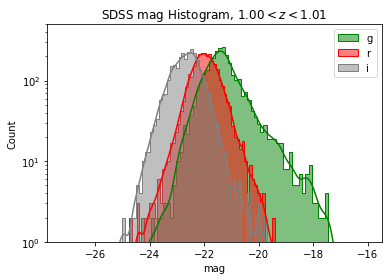

In [13]:
sns.histplot(x='M_g', data=df2, color="green", label="g", kde=True, element="step")
sns.histplot(x='M_r', data=df2, color="red", label='r', kde=True, element="step")
sns.histplot(x='M_i', data=df2, color="grey", label='i', kde=True, element="step")
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1, 5e2)
plt.title(r"SDSS mag Histogram, $1.00<z<1.01$")
plt.legend()
# plt.savefig('gri2.jpg', dpi=500)
print(len(df2))

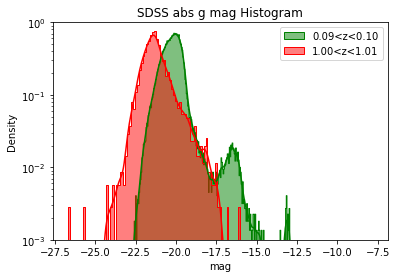

In [14]:
sns.histplot(x='M_g', data=df1, color="green", label="0.09<z<0.10", kde=True, element="step", stat='density')
sns.histplot(x='M_g', data=df2, color="red", label="1.00<z<1.01", kde=True, element="step", stat='density')
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1e-3, 1)
plt.title(r"SDSS abs g mag Histogram")
plt.legend()
# plt.savefig('gri2.jpg', dpi=500)
# print(len(df2))

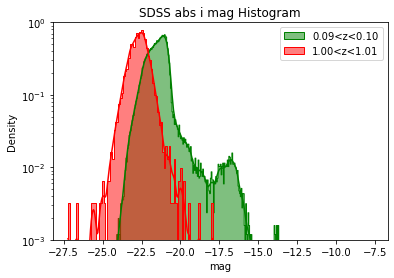

In [15]:
sns.histplot(x='M_i', data=df1, color="green", label="0.09<z<0.10", kde=True, element="step", stat='density')
sns.histplot(x='M_i', data=df2, color="red", label="1.00<z<1.01", kde=True, element="step", stat='density')
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1e-3, 1)
plt.title(r"SDSS abs i mag Histogram")
plt.legend()
# plt.savefig('gri2.jpg', dpi=500)
# print(len(df2))

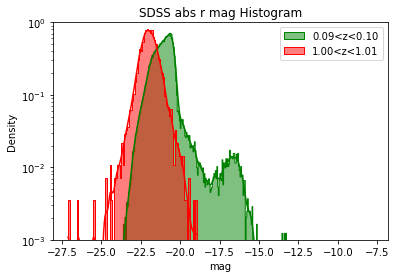

In [16]:
sns.histplot(x='M_r', data=df1, color="green", label="0.09<z<0.10", kde=True, element="step", stat='density')
sns.histplot(x='M_r', data=df2, color="red", label="1.00<z<1.01", kde=True, element="step", stat='density')
plt.xlabel("mag")
plt.yscale("log")
plt.ylim(1e-3, 1)
plt.title(r"SDSS abs r mag Histogram")
plt.legend()
# plt.savefig('gri2.jpg', dpi=500)
# print(len(df2))

### warna

In [17]:
# df1.insert(0, 'g-r', df1['g'].values - df1['r'].values)
# ri=df1['r'].values - df1['i'].values,
#                  gi=df1['g'].values - df1['i'].values,
# df2 = df2.assign(gr=df2['g'].values - df2['r'].values,
#                  ri=df2['r'].values - df2['i'].values,
#                  gi=df2['g'].values - df2['i'].values)
df1['g-r'] = df1['g'].values - df1['r'].values
df1['g-i'] = df1['g'].values - df1['i'].values
df1['r-i'] = df1['r'].values - df1['i'].values

df2['g-r'] = df2['g'].values - df2['r'].values
df2['g-i'] = df2['g'].values - df2['i'].values
df2['r-i'] = df2['r'].values - df2['i'].values

In [18]:
df1.describe()

,g,i,r,z,dist,M_i,M_g,M_r,g-r,g-i,r-i
count,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000,51495.000000
mean,18.026055,16.801717,17.216102,0.094964,435.659139,-21.392903,-20.168564,-20.978517,0.809953,1.224338,0.414385
std,0.864582,0.964361,0.944326,0.002859,13.955103,0.965436,0.864932,0.945424,0.297775,0.347033,0.192011
min,14.471370,13.564950,13.709770,0.090001,411.481192,-24.733908,-23.629038,-24.602925,-8.735510,-7.080630,-7.752340
25%,17.554895,16.259780,16.692570,0.092525,423.748305,-21.937426,-20.638202,-21.502079,0.669160,1.057510,0.382120
50%,17.995750,16.778050,17.193980,0.094946,435.550842,-21.421134,-20.202051,-21.001969,0.882080,1.306960,0.419920
75%,18.356555,17.177420,17.579240,0.097371,447.406174,-21.018835,-19.835596,-20.617557,0.967345,1.407560,0.450530
max,30.354280,30.562360,30.430370,0.100000,460.295848,-7.672491,-7.821626,-7.804481,11.959550,12.183900,9.952160


Text(0.5, 1.0, 'SDSS color Histogram, $0.09<z<0.10$')

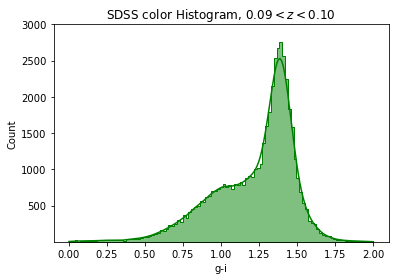

In [19]:
mask = (df1['g-i']>-0.0)*(df1['g-i']<2)
sns.histplot(x='g-i', data=df1[mask], color="green", kde=True, element="step")
plt.ylim(1, 3000)
plt.title(r"SDSS color Histogram, $0.09<z<0.10$")
# plt.savefig('g-i1.jpg', dpi=500)

Text(0.5, 1.0, 'SDSS color Histogram, $1.00<z<1.01$')

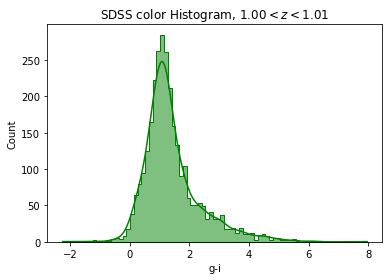

In [20]:
mask = (df2['g-i']>-2.5)*(df2['g-i']<8)
sns.histplot(x='g-i', data=df2[mask], color="green", kde=True, element="step")
plt.title(r"SDSS color Histogram, $1.00<z<1.01$")
# plt.savefig('g-i1.jpg', dpi=500)

In [21]:
df2.describe()

,g,i,r,z,dist,M_i,M_g,M_r,g-r,g-i,r-i
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000
mean,22.864069,21.451013,22.145669,1.004849,6646.687461,-22.661999,-21.248943,-21.967342,0.718400,1.413056,0.694656
std,0.877384,0.643874,0.613951,0.002983,24.390493,0.643779,0.877255,0.613737,0.720871,0.970679,0.537637
min,17.402020,16.880380,16.981110,1.000005,6607.093701,-27.220086,-26.698446,-27.119356,-2.031600,-4.873520,-3.953520
25%,22.356777,21.060710,21.804118,1.002166,6624.748231,-23.051913,-21.758686,-22.308621,0.296983,0.843983,0.360135
50%,22.751330,21.476760,22.129965,1.004786,6646.165350,-22.639244,-21.363640,-21.981760,0.598440,1.189830,0.640145
75%,23.205272,21.815885,22.482418,1.007513,6668.471926,-22.300579,-20.907081,-21.630058,0.962305,1.751232,1.050052
max,28.075160,26.185230,25.166750,1.009994,6688.779316,-17.938688,-16.039928,-18.936942,6.773560,7.958750,3.139330


Text(0.5, 1.0, 'SDSS color Histogram')

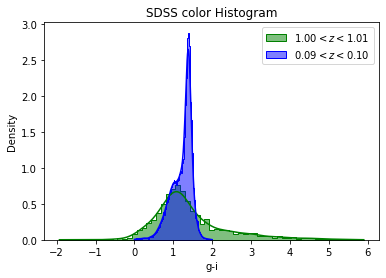

In [22]:
mask2 = (df2['g-i']>-2)*(df2['g-i']<6)
mask1 = (df1['g-i']>-0)*(df1['g-i']<2)
sns.histplot(x='g-i', data=df2[mask2], color="green", kde=True, element="step", stat='density', label=r'$1.00<z<1.01$')
sns.histplot(x='g-i', data=df1[mask1], color="blue", kde=True, element="step", stat='density', label=r'$0.09<z<0.10$')
plt.legend()
plt.title(r"SDSS color Histogram")
# plt.savefig('g-i1.jpg', dpi=500)

[Text(0.5, 1.0, '$0.09<z<0.10$')]

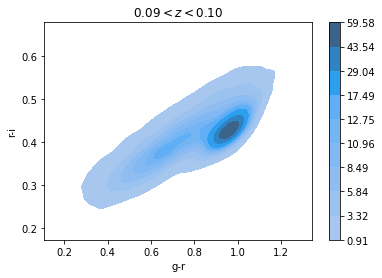

In [23]:
mask = (df1['g-r']>0.2)*(df1['g-r']<1.25)*(df1['r-i']>0.2)*(df1['r-i']<0.65)
fig, ax = plt.subplots()
sns.kdeplot(x="g-r", y='r-i', data=df1[mask], shade=True, cbar=True, ax=ax).set(title=r"$0.09<z<0.10$")
# sns.scatterplot(x='gr', y='ri', data=df1[mask].sample(n=1000, replace=False), s=1, color='red', ax=ax)

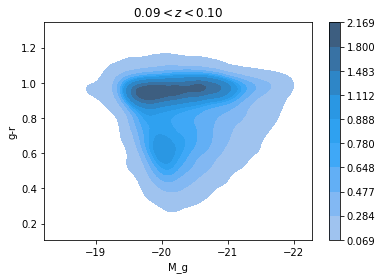

In [24]:
mask = (df1['g-r']>0.2)*(df1['g-r']<1.25)*(df1['M_g']>-22)*(df1['M_g']<-18.5)
fig, ax = plt.subplots()
sns.kdeplot(x="M_g", y='g-r', data=df1[mask], shade=True, cbar=True, ax=ax).set(title=r"$0.09<z<0.10$")
plt.gca().invert_xaxis()
# sns.scatterplot(x='M_g', y='gr', data=df1[mask].sample(n=1000, replace=False), s=1, color='red', ax=ax)

[Text(0.5, 1.0, '$1.00<z<1.01$')]

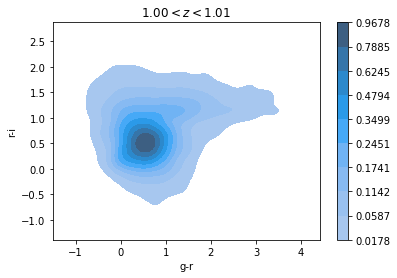

In [25]:
mask = (df2['g-r']>-1)*(df2['g-r']<4)*(df2['r-i']>-1)*(df2['r-i']<2.5)
fig, ax = plt.subplots()
sns.kdeplot(x="g-r", y='r-i', data=df2[mask], shade=True, cbar=True, ax=ax).set(title=r"$1.00<z<1.01$")
# sns.scatterplot(x='gr', y='ri', data=df2[mask].sample(n=1000, replace=False), s=1, color='red', ax=ax)

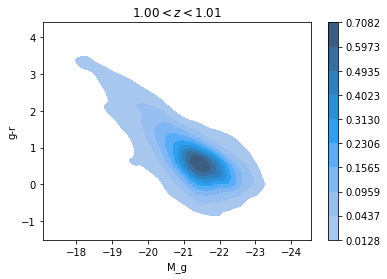

In [26]:
mask = (df2['g-r']>-1)*(df2['g-r']<4)*(df2['M_g']>-24)*(df2['M_g']<-17.5)
fig, ax = plt.subplots()
sns.kdeplot(x="M_g", y='g-r', data=df2[mask], shade=True, cbar=True, ax=ax).set(title=r"$1.00<z<1.01$")
plt.gca().invert_xaxis()
# sns.scatterplot(x='gr', y='ri', data=df2[mask].sample(n=1000, replace=False), s=1, color='red', ax=ax)

Text(0.5, 1.0, 'Diagram warna-warna SDSS')

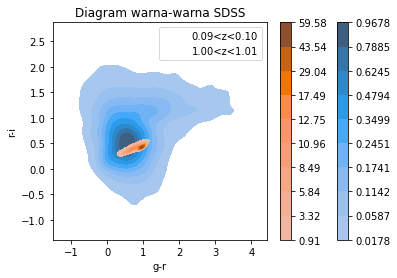

In [27]:
mask1 = (df1['g-r']>0.2)*(df1['g-r']<1.25)*(df1['r-i']>0.2)*(df1['r-i']<0.65)
mask2 = (df2['g-r']>-1)*(df2['g-r']<4)*(df2['r-i']>-1)*(df2['r-i']<2.5)
sns.kdeplot(x="g-r", y='r-i', data=df2[mask2], shade=True, cbar=True, label="0.09<z<0.10")
sns.kdeplot(x="g-r", y='r-i', data=df1[mask1], shade=True, cbar=True, label="1.00<z<1.01")
plt.legend()
plt.title("Diagram warna-warna SDSS")
# plt.savefig('help.jpg', dpi=200)

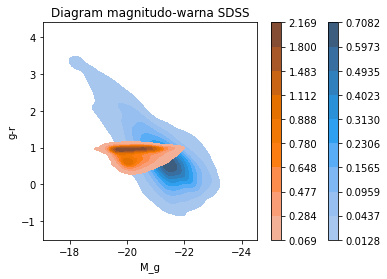

In [29]:
mask1 = (df1['g-r']>0.2)*(df1['g-r']<1.25)*(df1['M_g']>-22)*(df1['M_g']<-18.5)
mask2 = (df2['g-r']>-1)*(df2['g-r']<4)*(df2['M_g']>-24)*(df2['M_g']<-17.5)
sns.kdeplot(x="M_g", y='g-r', data=df2[mask2], shade=True, cbar=True)
sns.kdeplot(x="M_g", y='g-r', data=df1[mask1], shade=True, cbar=True)
plt.title("Diagram magnitudo-warna SDSS")
plt.gca().invert_xaxis()